<h1>5. Intercative Data Analysis </h1>
This notebook introduces caryying out interactive data analysis using datalab
This cell, for example, is a markdown cell containing text content

explaination-1: The below cell is the code cell in which the python code is written.
                Two variable are added and thier result is displayed

In [4]:
a = 3
b = a+5
print "a={} b={}".format(a,b)

a=3 b=8


explanation-2: This is cell displaying shell command. One can execute shell commands as well in Cloud DataLab

In [5]:
!pwd

/content/datalab/notebooks


explanation-3: in order to know the python modules installed in current compute, we use the follwing command:

In [6]:
!pip freeze

absl-py==0.6.1
alembic==0.8.10
apache-airflow==1.9.0
asn1crypto==0.24.0
astor==0.7.1
avro==1.8.2
backports-abc==0.5
backports.functools-lru-cache==1.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.5.0.1
backports.weakref==1.0.post1
beautifulsoup4==4.7.1
bleach==2.1.2
blinker==1.4
bokeh==1.0.3
brewer2mpl==1.4.1
bs4==0.0.1
cachetools==2.1.0
certifi==2018.11.29
cffi==1.11.5
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
configparser==3.5.0
crcmod==1.7
croniter==0.3.26
cryptography==2.3.1
cycler==0.10.0
cytoolz==0.9.0.1
dask==0.17.1
datalab==1.1.3
decorator==4.3.0
dill==0.2.6
distributed==1.21.8
docutils==0.14
entrypoints==0.2.3
enum34==1.1.6
fastcache==1.0.2
Flask==0.11.1
Flask-Admin==1.4.1
Flask-Cache==0.13.1
Flask-Login==0.2.11
flask-swagger==0.2.13
Flask-WTF==0.14
funcsigs==1.0.0
functools32==3.2.3.post2
future==0.16.0
futures==3.2.0
gast==0.2.2
ggplot==0.6.8
gitdb2==2.0.5
GitPython==2.1.11
google-api-core==1.7.0
google-api-python-client==1.6.2
google-apitools

explanation-4: in order to upgrade the google cloud big query module, use the following command

In [7]:
!pip install --upgrade google-cloud-bigquery

Requirement already up-to-date: google-cloud-bigquery in /usr/local/envs/py2env/lib/python2.7/site-packages (1.9.0)


explanation-5: In order to import libraries such as seaborn, numpy and bigquery 

In [8]:
import seaborn as sns
import numpy as np
from google.cloud import bigquery
client = bigquery.Client()

explanation-6:In order to execute a query we use the following code. This code will query in the big-query database in the dataset flights from the table tzcorr using big query client and will display the results

In [9]:
sql = """
SELECT ARR_DELAY, DEP_DELAY
FROM `flights.tzcorr`
WHERE DEP_DELAY >= 10 AND RAND() < 0.01
"""


df = client.query(sql).to_dataframe()
df.describe()

,ARR_DELAY,DEP_DELAY
count,31025.000000,31250.000000
mean,46.317550,51.358048
std,65.679494,63.396222
min,-46.000000,10.000000
25%,10.000000,17.000000
50%,27.000000,30.000000
75%,59.000000,61.000000
max,1223.000000,1236.000000


Explanation-7: The following code snippet generates the violin plot. The figure explains that the number of flights that 
               arrive 10 mins late is the maximum. Also the graph is unbiased when taken the peak of the graph as reference.
               So the number of flights arriving late is more than the number of flights arriving early ot no time. This is 
               quite true in real life situations as well. A flight is more likely to arrive late rather than early.  

/usr/local/envs/py2env/lib/python2.7/site-packages/seaborn/categorical.py:584: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/envs/py2env/lib/python2.7/site-packages/seaborn/categorical.py:812: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


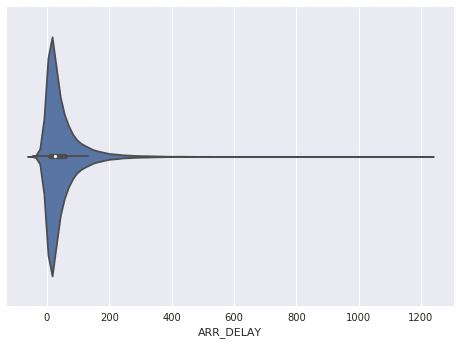

In [10]:
sns.set_style("whitegrid")
sns.set(font= 'DejaVu Sans')
ax = sns.violinplot(data= df,x='ARR_DELAY',inner='box',orient='h')

Explanation-8: The 10 minute delay divides the flights into two saperate groups. One, the flights that depart more than 10 mins late is                  skewed towards higher values of arrival delay. Two, the flights that depart less or equal to 10 mins late are towards lower                value of arrival delay. The no of flights that are delayed less than 10 mins are much more concentrated around the center                  of the box plot than the no of flights that are delayed more than 10 mins. One can say from the the extremely skewed                      structure for the upper part of the graph 

(-50, 200)

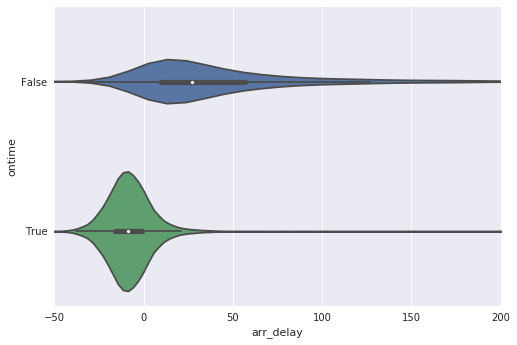

In [11]:
sql = """
select arr_delay, dep_delay
from `flights.tzcorr`
where rand() < 0.001
"""
df = client.query(sql).to_dataframe()
df['ontime'] = df['dep_delay']<10
ax = sns.violinplot(data= df,x='arr_delay',y='ontime',inner='box',orient='h')
ax.set_xlim(-50,200)



Explanation-9: The query to get the average of arrival delays associated with eaxh departure delay. The sql query retrives the first 20                  row. 

In [12]:
sql = "SELECT AVG(ARR_DELAY)AS arrival_delay,DEP_DELAY FROM flights.tzcorr GROUP BY DEP_DELAY ORDER  by DEP_DELAY LIMIT 20"
df = client.query(sql).to_dataframe()
df

,arrival_delay,DEP_DELAY
0,NaN,NaN
1,-80.000000,-82.0
2,-87.000000,-68.0
3,-77.000000,-61.0
4,7.000000,-59.0
5,-35.000000,-56.0
6,-60.000000,-55.0
7,-57.500000,-52.0
8,-49.000000,-51.0
9,-50.000000,-49.0


Explanation-10: If we query the number of flights for each of the departure delays we get the following result

In [13]:
sql = "SELECT DEP_DELAY, AVG(ARR_DELAY) AS arrival_delay,  COUNT(ARR_DELAY) AS numflights FROM `flights.tzcorr` GROUP BY DEP_DELAY ORDER BY   DEP_DELAY"
df = client.query(sql).to_dataframe()
df

,DEP_DELAY,arrival_delay,numflights
0,NaN,NaN,0
1,-82.0,-80.000000,2
2,-68.0,-87.000000,2
3,-61.0,-77.000000,2
4,-59.0,7.000000,2
5,-56.0,-35.000000,4
6,-55.0,-60.000000,2
7,-52.0,-57.500000,4
8,-51.0,-49.000000,4
9,-49.0,-50.000000,2


if we modify the query to get the trend of the number of flights we see that departure delay of few minutes have thousands of flights associated with it

In [14]:
sql = "SELECT DEP_DELAY, AVG(ARR_DELAY) AS arrival_delay, COUNT(ARR_DELAY) AS numflights FROM `flights.tzcorr` GROUP BY DEP_DELAY having numflights <20 or numflights>=1000 ORDER BY DEP_DELAY LIMIT 50"
df = client.query(sql).to_dataframe()
df

,DEP_DELAY,arrival_delay,numflights
0,NaN,NaN,0
1,-82.0,-80.000000,2
2,-68.0,-87.000000,2
3,-61.0,-77.000000,2
4,-59.0,7.000000,2
5,-56.0,-35.000000,4
6,-55.0,-60.000000,2
7,-52.0,-57.500000,4
8,-51.0,-49.000000,4
9,-49.0,-50.000000,2


Explanation-11: In order to remove outliers in the no of flights, we need to remove the flights that are 3 times
                standard deviation away from the average departure delay. Here it is assumed that delay follows gaussian distribution

In [15]:
sql = "SELECT AVG(DEP_DELAY) - 3*STDDEV(DEP_DELAY) AS filtermin, AVG(DEP_DELAY) + 3*STDDEV(DEP_DELAY) AS filtermax FROM flights.tzcorr"

df = client.query(sql).to_dataframe()
df

,filtermin,filtermax
0,-102.405541,120.590908


Explanation-12: If we don't go by the assumption that distribution is gaussian, then we can omit top 5 and bottom 5 percentage of the                     values. Looking at the results we have to select values from [-9 ,66]. Better if viewed in Big-Query

In [16]:
sql = "SELECT APPROX_QUANTILES(DEP_DELAY, 20) FROM `flights.tzcorr`"
df = client.query(sql).to_dataframe()
df

,f0_
0,"[-82.0, -9.0, -7.0, -6.0, -5.0, -5.0, -4.0, -4..."


Explanation-13: Here we are defining our outlier as the data that doesnot meet the criterion of frequency of occurence. The
                threshold for the frequency of occurence is 370 in our case

In [17]:
sql = '''SELECT DEP_DELAY,
  AVG(ARR_DELAY) AS arrival_delay,
  STDDEV(ARR_DELAY) AS stddev_arrival_delay,
  COUNT(ARR_DELAY) AS numflights
FROM
  `flights.tzcorr`
GROUP BY
  DEP_DELAY
HAVING
  numflights > 370
ORDER BY
  DEP_DELAY'''
df = client.query(sql).to_dataframe()
df

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-26.0,-24.407725,11.698041,466
1,-25.0,-25.189349,10.384016,676
2,-24.0,-24.177384,11.671209,902
3,-23.0,-23.984076,10.985963,1256
4,-22.0,-23.382181,12.334412,1706
5,-21.0,-22.481541,12.220084,2492
6,-20.0,-21.672784,12.350545,3814
7,-19.0,-20.611426,12.211909,5286
8,-18.0,-20.030864,12.267756,7776
9,-17.0,-19.134424,12.292676,11248


Explanation-14: To get the departure delays with more than 370 flights, we run the following sql query

In [20]:
sql = """
SELECT
  DEP_DELAY,
  arrival_delay,
  stddev_arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    STDDEV(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""


depdelay = client.query(sql).to_dataframe()
depdelay[:5]

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-26.0,-24.407725,11.698041,466
1,-25.0,-25.189349,10.384016,676
2,-24.0,-24.177384,11.671209,902
3,-23.0,-23.984076,10.985963,1256
4,-22.0,-23.382181,12.334412,1706


Explanation-15: The below graph plots the relationship between arrival delay and departure delay. This relationship is quite linear. The 
                width of the standard deviation is of the arrival delay is pretty constant, on the order of 10 mins

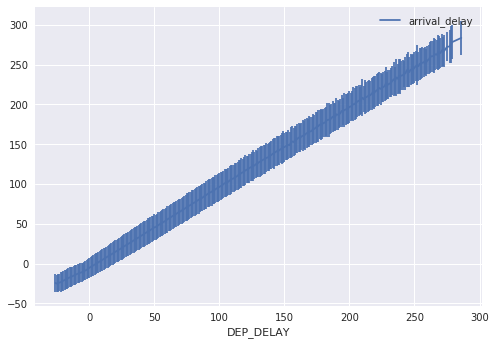

In [27]:
ax = depdelay.plot(kind='line',x='DEP_DELAY',y='arrival_delay',yerr='stddev_arrival_delay')

Explanation-16: A way to use bigquery to create tables in notebook

In [23]:
%bigquery create dataset -n temp_dataset
%bigquery execute -q depdelayquery -t my_temp_dataset.delays

Explanation 16: By computing the standard deviation of the arrival delays corresponding to each departure delay, we implicitly assumed that arrival delays are normally distributed. find where 0.3 happens. from the z-table, this happens at Z = 0.52 

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,u'>30% likelihood of this arrival delay (minutes)')

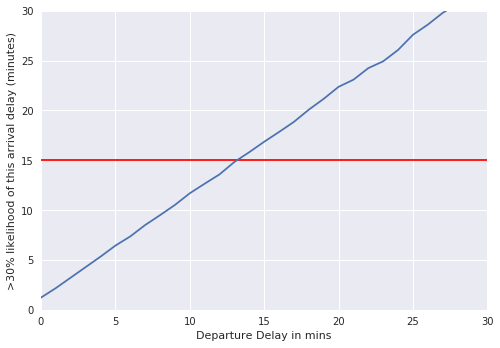

In [26]:
import matplotlib.pyplot as plt
Z_30 = 0.52
depdelay['arr_delay_30']= (Z_30 * depdelay['stddev_arrival_delay']) + depdelay['arrival_delay']
plt.axhline(y=15,color='r')
ax = plt.axes()
depdelay.plot(kind='line',x='DEP_DELAY',y='arr_delay_30',ax=ax,ylim=(0,30),xlim=(0,30),legend=False)
ax.set_xlabel('Departure Delay in mins')
ax.set_ylabel('>30% likelihood of this arrival delay (minutes)')

Text(0,0.5,u'>30% likelihood of this arrival delay')

Text(0,0.5,u'>30% likelihood of this arrival delay')

Text(0,0.5,u'>30% likelihood of this arrival delay')

Text(0,0.5,u'>30% likelihood of this arrival delay')

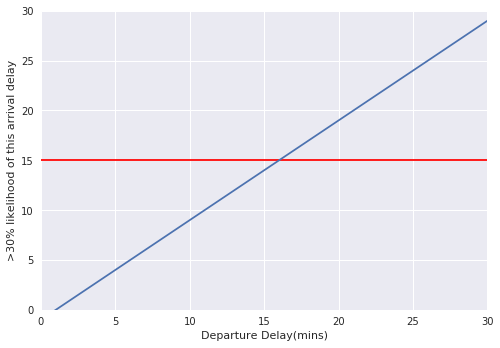

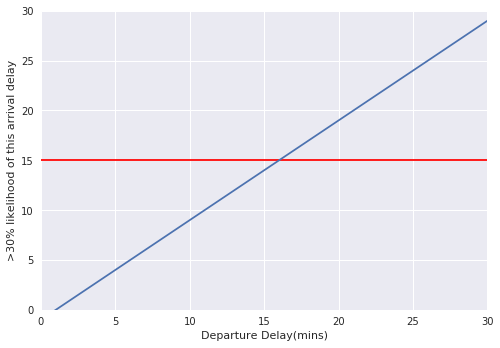

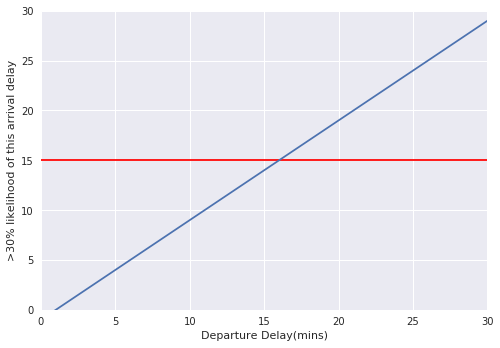

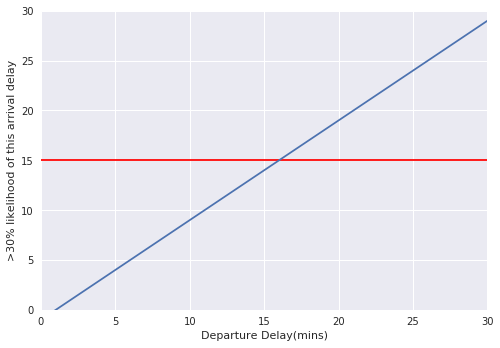

In [29]:
sql='''SELECT
  DEP_DELAY,
  APPROX_QUANTILES(ARR_DELAY, 101)[OFFSET(70)] AS arrival_delay,
  COUNT(ARR_DELAY) AS numflights
FROM
  `flights.tzcorr`
GROUP BY
  DEP_DELAY
HAVING
  numflights > 370
ORDER BY
  DEP_DELAY'''
depdelay = client.query(sql).to_dataframe()

plt.axhline(y=15,color='r')
ax = plt.axes()
depdelay.plot(kind= 'line',x='DEP_DELAY',y='arrival_delay',ax=ax,ylim=(0,30),xlim=(0,30),legend=False)
ax.set_xlabel('Departure Delay(mins)')
ax.set_ylabel('>30% likelihood of this arrival delay')